<a href="https://colab.research.google.com/github/probml/pyprobml/blob/master/notebooks/ae_mnist_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Author of the assignment**
<h2> Soham Bhattacharya <br>
B2430059 <br>
RKMVERI Belur </h2>
<br>
Date: 28th March 2025

# Autoencoders



In [23]:
# Added this in order to eradicate any warnings that come up
# for GPU-CUDA compatibility
# So explicitly disabling the GPU computation which is not required
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
# import tensorflow as tf

In [24]:
import tensorflow as tf
from tensorflow import keras

In [25]:
# Standard Python libraries
import os
import time
import numpy as np
import glob
import matplotlib as mpl
import matplotlib.pyplot as plt
import PIL

In [26]:
np.random.seed(123)
tf.random.set_seed(123)


(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

# Partition training into train and valid
X_train_full = train_images
y_train_full = train_labels

X_train, X_valid = X_train_full[:-6000], X_train_full[-6000:]
y_train, y_valid = y_train_full[:-6000], y_train_full[-6000:]

# Vanilla AE MLP

In [27]:
def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")

In [28]:
def show_reconstructions(model, images=X_valid, n_images=10):
    reconstructions = model.predict(images[:n_images])
    plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plot_image(images[image_index])
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plot_image(reconstructions[image_index])

In [29]:
stacked_encoder = keras.models.Sequential(
    [
        keras.layers.Flatten(input_shape=[28, 28]),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dense(32, activation="relu"),
    ]
)

In [30]:
stacked_decoder = keras.models.Sequential(
    [
        keras.layers.Dense(128, activation="relu", input_shape=[32]),
        keras.layers.Dense(28*28, activation="sigmoid"),
        keras.layers.Reshape([28, 28]),
    ]
)

In [31]:
stacked_ae = keras.models.Sequential([stacked_encoder, stacked_decoder])

stacked_encoder.summary()
stacked_decoder.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 32)             │         4,128 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,608 (408.62 KB)

 Trainable params: 104,608 (408.62 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 784)            │       101,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_2 (Reshape)             │ (None, 28, 28)         │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,360 (411.56 KB)

 Trainable params: 105,360 (411.56 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
stacked_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.5))
history = stacked_ae.fit(X_train, X_train, epochs=1, validation_data=(X_valid, X_valid))

2025-03-28 22:33:39.044339: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 169344000 exceeds 10% of free system memory.


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.4109 - val_loss: 0.3248


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


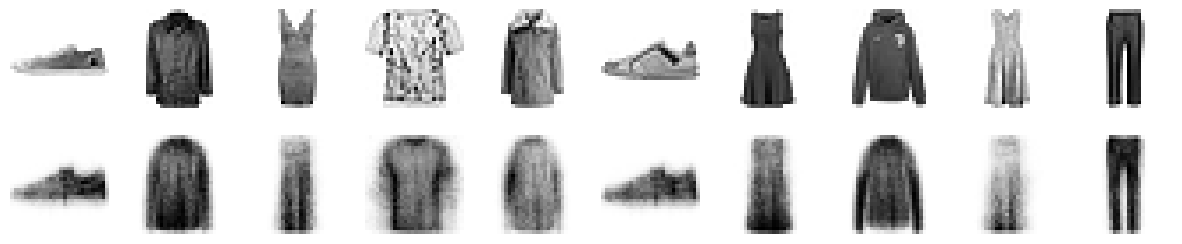

In [33]:
show_reconstructions(stacked_ae)

## 1) Implement an AutoEncoder by adding Bernoulli dropout noise in an encoder layer

```
# This is formatted as code
```



In [34]:
dropout_rate = 0.25 # my choice

stacked_encoder_with_dropout = keras.models.Sequential(
    [
        keras.layers.Flatten(input_shape=[28, 28]),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dropout(dropout_rate), # The Bernoulli dropout rate is put here
        keras.layers.Dense(32, activation="relu"),
    ]
)

In [37]:
# Create the autoencoder with the modified encoder
stacked_ae_do = keras.models.Sequential([stacked_encoder_with_dropout, stacked_decoder])

1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.3130 - val_loss: 0.3070
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


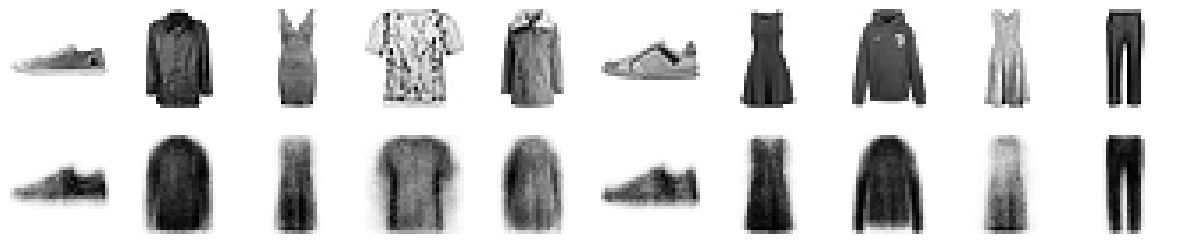

In [38]:
stacked_ae_do.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.5))
history = stacked_ae.fit(X_train, X_train, epochs=1, validation_data=(X_valid, X_valid))

show_reconstructions(stacked_ae)

## 2) Implement an Sparse AutoEncoder using KL Regularisation

In [41]:
sparse_encoder = keras.models.Sequential([
    keras.layers.Input(shape=[28,28]),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(32, activation="sigmoid") # Sigmoid added for sparsity
])

In [42]:
def KL_Divergence_Loss(y_true, y_pred):
    avg_activations = tf.reduce_mean(y_pred, axis=0)
    KL_Loss = sparsity_weight*tf.reduce_sum(
        sparsity_target*tf.math.log(sparsity/avg_activations)
        +(1-sparsity_target)* tf.math.log((1-sparsity_target)/(1-avg_activations)))
    
    return KL_Loss

In [44]:
sparse_ae = keras.models.Sequential([sparse_encoder, stacked_decoder])

In [46]:
reconstruction_loss = tf.keras.losses.binary_crossentropy

In [47]:
def sparse_loss(y_true, y_pred):
    return reconstruction_loss(y_true, y_pred)+kl_loss_fn(y_true,sparse_encoder(y_true))

In [48]:
# Compile the model
sparse_ae.compile(loss=sparse_loss, optimizer=keras.optimizers.SGD(learning_rate=1.5))

1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.3026 - val_loss: 0.3020
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


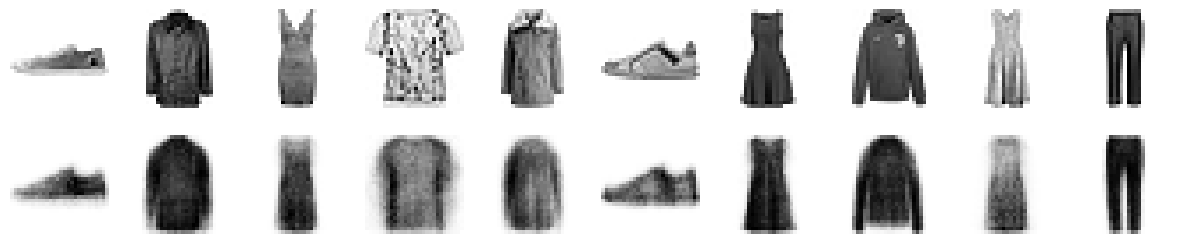

In [49]:
history = stacked_ae.fit(X_train, X_train, epochs=1, validation_data=(X_valid, X_valid))

show_reconstructions(stacked_ae)

# THANK YOU